# 로지스틱 회귀
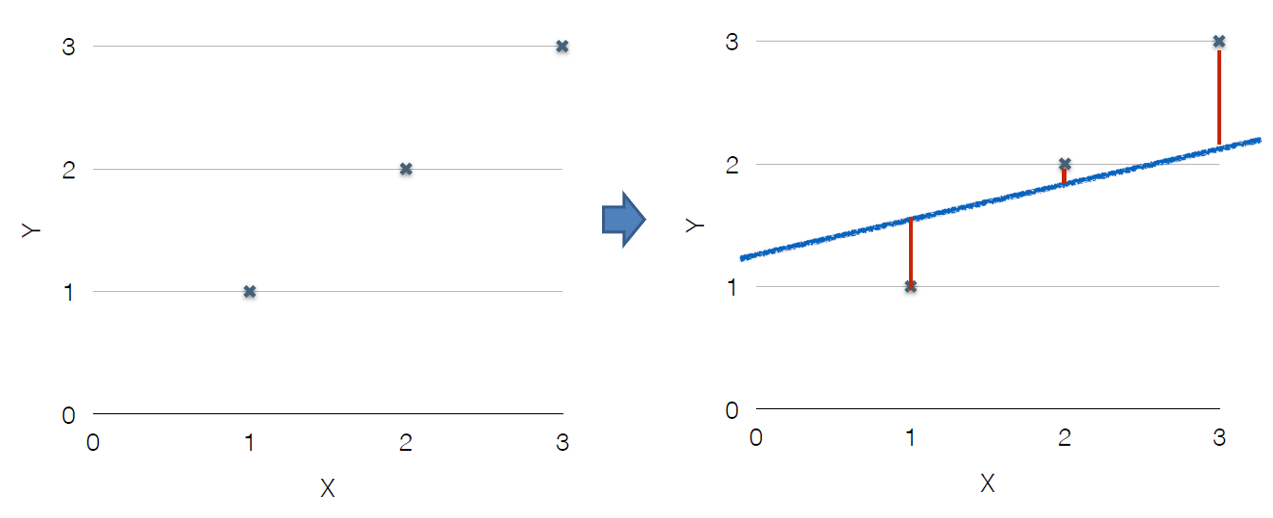

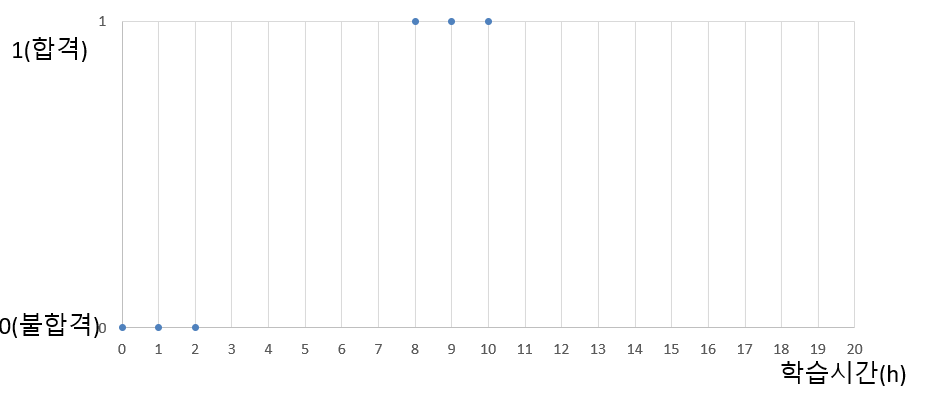

## sigmoid 함수
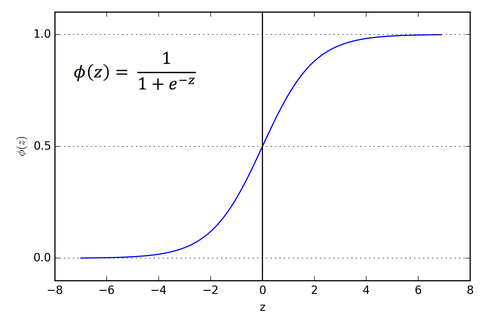   
 z입력에 무엇이 들어가든 결과값이 0과 1사이의 값이 된다.

## sigmoid 함수의 손실함수
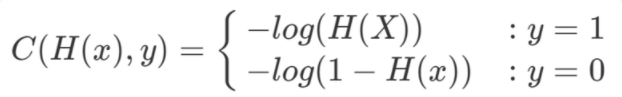

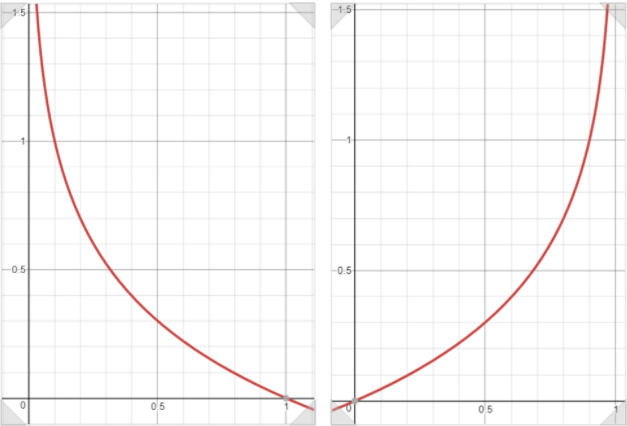

## 로지스틱 회귀 실습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, 
                                                      cancer.target, 
                                                      test_size=0.3, 
                                                      random_state=0)

In [3]:
from sklearn.metrics import accuracy_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [5]:
get_clf_eval(y_test,lr_preds)

오차 행렬
[[ 60   3]
 [  1 107]]
정확도: 0.9766, 정밀도: 0.9727, 재현율: 0.9907


### 로지스틱 회귀 모델 생성 함수

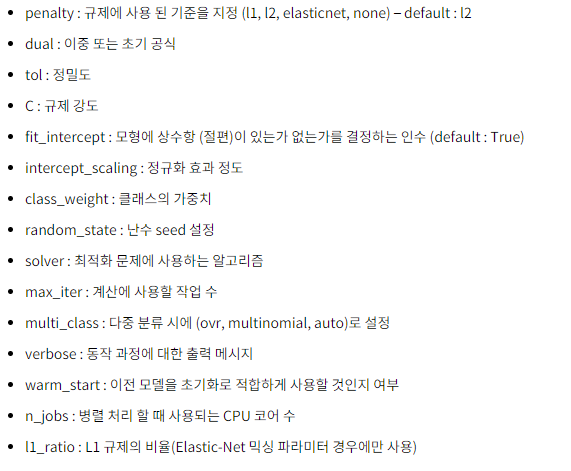

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}'.format(grid_clf.best_params_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}


In [ ]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_clf.best_estimator_
estimator

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_preds = estimator.predict(X_test)

In [ ]:
get_clf_eval(y_test,clf_preds)

오차 행렬
[[ 62   1]
 [  1 107]]
정확도: 0.9883, 정밀도: 0.9907, 재현율: 0.9907
